# Data Visualization Boot Camp: Visualization Block 1 - Physics: Projectile Motion Trajectories / Oscillations

Welcome to the first Visualization block! In physics, understanding motion often involves visualizing paths and changes over time. Today, we'll focus on creating **line plots** to visualize **projectile motion trajectories** and **oscillations**, and **scatter plots** to explore relationships between physical quantities, all using Matplotlib.

## 1.1 Welcome & Why Visualize Motion Data?

Visualizing physics data is crucial for:
* **Understanding Paths:** Clearly seeing the arc of a projectile or the back-and-forth motion of an oscillator.
* **Identifying Relationships:** Quickly spotting how one variable (e.g., initial velocity) affects another (e.g., range).
* **Comparing Scenarios:** Easily comparing the motion under different conditions (e.g., different launch angles).
* **Communicating Concepts:** Explaining complex physics principles through clear diagrams.

We'll use **Matplotlib**, the foundational plotting library in Python.

In [14]:
import matplotlib.pyplot as plt
import pandas as pd # Needed for loading data
import numpy as np  # For creating oscillation data
# Removed: from ipywidgets import interact, FloatSlider
# Removed: from IPython.display import display

%matplotlib inline # Ensures plots are displayed directly in Jupyter

print("Matplotlib, Pandas, and NumPy imported successfully!")

UsageError: unrecognized arguments: # Ensures plots are displayed directly in Jupyter


We'll use a hypothetical `projectile_data.csv` for our examples, representing the `x` and `y` positions of projectiles and results from different trials. Please create this file in the same directory as your notebook:
```csv
TrialID,Time_s,PositionX_m,PositionY_m,InitialVelocity_mps,LaunchAngle_deg,Range_m
T001,0.0,0.0,0.0,20,45,40.8
T001,0.5,7.07,6.07,20,45,40.8
T001,1.0,14.14,9.14,20,45,40.8
T001,1.5,21.21,9.21,20,45,40.8
T001,2.0,28.28,6.28,20,45,40.8
T001,2.5,35.35,0.35,20,45,40.8
T002,0.0,0.0,0.0,25,30,55.1
T002,0.5,10.83,5.05,25,30,55.1
T002,1.0,21.65,7.60,25,30,55.1
T002,1.5,32.48,7.15,25,30,55.1
T002,2.0,43.30,3.70,25,30,55.1
T002,2.5,54.13,-2.75,25,30,55.1
```
Now, let's load this data:


In [15]:
try:
    projectile_df = pd.read_csv('projectile_data.csv')
    print("Projectile Data DataFrame loaded successfully:")
    print(projectile_df.head())
except FileNotFoundError:
    print("Error: 'projectile_data.csv' not found. Please create it or ensure it's in the correct directory.")
    # Dummy DataFrame if file not found
    data = {
        'TrialID': ['T001', 'T001', 'T001', 'T001', 'T001', 'T001', 'T002', 'T002', 'T002', 'T002', 'T002', 'T002'],
        'Time_s': [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5],
        'PositionX_m': [0.0, 7.07, 14.14, 21.21, 28.28, 35.35, 0.0, 10.83, 21.65, 32.48, 43.30, 54.13],
        'PositionY_m': [0.0, 6.07, 9.14, 9.21, 6.28, 0.35, 0.0, 5.05, 7.60, 7.15, 3.70, -2.75],
        'InitialVelocity_mps': [20, 20, 20, 20, 20, 20, 25, 25, 25, 25, 25, 25],
        'LaunchAngle_deg': [45, 45, 45, 45, 45, 45, 30, 30, 30, 30, 30, 30],
        'Range_m': [40.8, 40.8, 40.8, 40.8, 40.8, 40.8, 55.1, 55.1, 55.1, 55.1, 55.1, 55.1]
    }
    projectile_df = pd.DataFrame(data)
    print("\nUsing a dummy DataFrame for demonstration.")
    print(projectile_df.head())

Error: 'projectile_data.csv' not found. Please create it or ensure it's in the correct directory.

Using a dummy DataFrame for demonstration.
  TrialID  Time_s  PositionX_m  PositionY_m  InitialVelocity_mps  \
0    T001     0.0         0.00         0.00                   20   
1    T001     0.5         7.07         6.07                   20   
2    T001     1.0        14.14         9.14                   20   
3    T001     1.5        21.21         9.21                   20   
4    T001     2.0        28.28         6.28                   20   

   LaunchAngle_deg  Range_m  
0               45     40.8  
1               45     40.8  
2               45     40.8  
3               45     40.8  
4               45     40.8  


## 1.3 Line Plots: Projectile Trajectories and Oscillations

Line plots are perfect for showing the path of an object in motion (like $y$ vs. $x$ for a projectile) or how a physical quantity changes over time (like displacement in an oscillation).

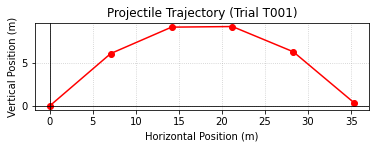

In [16]:
# Filter data for a specific projectile trial (T001)
trial_1_data = projectile_df[projectile_df['TrialID'] == 'T001']

# Plot the projectile trajectory (Y vs. X position)
plt.plot(trial_1_data['PositionX_m'], trial_1_data['PositionY_m'], marker='o', linestyle='-', color='red')

# Add labels and a title
plt.xlabel("Horizontal Position (m)")
plt.ylabel("Vertical Position (m)")
plt.title("Projectile Trajectory (Trial T001)")
plt.grid(True, linestyle=':', alpha=0.7)
plt.axhline(0, color='black', linewidth=0.8) # Ground level
plt.axvline(0, color='black', linewidth=0.8) # Launch point
plt.gca().set_aspect('equal', adjustable='box') # Make scales equal for better visual

plt.show()

### Plotting Oscillations (e.g., Simple Harmonic Motion)

Let's simulate and plot a simple oscillating system, like a mass on a spring or a pendulum, showing displacement over time.

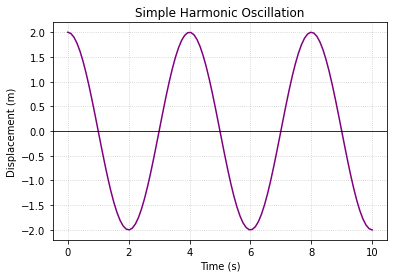

In [17]:
# Simulate oscillation data: A*cos(omega*t)
time_s = np.linspace(0, 10, 100) # 100 points from 0 to 10 seconds
amplitude_m = 2.0
angular_frequency = 0.5 * np.pi # radians/s
displacement_m = amplitude_m * np.cos(angular_frequency * time_s)

plt.plot(time_s, displacement_m, color='purple')
plt.xlabel("Time (s)")
plt.ylabel("Displacement (m)")
plt.title("Simple Harmonic Oscillation")
plt.grid(True, linestyle=':', alpha=0.7)
plt.axhline(0, color='black', linewidth=0.8) # Equilibrium position

plt.show()

### Projectile Motion Simulator: Edit Parameters to Explore!

Instead of sliders, you can directly edit the `initial_velocity` and `launch_angle_deg` values in the code below to see how they affect the projectile's trajectory. After changing the values, **run the cell** to update the plot.

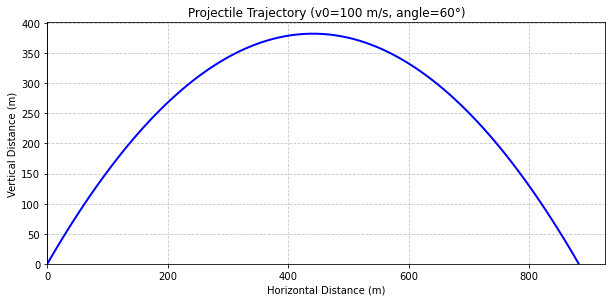

In [19]:
GRAVITY = 9.81 # m/s^2

def plot_projectile_trajectory(initial_velocity, launch_angle_deg):
    """
    Calculates and plots the trajectory of a projectile.
    
    Args:
        initial_velocity (float): The initial speed of the projectile in m/s.
        launch_angle_deg (float): The launch angle in degrees from the horizontal.
    """
    launch_angle_rad = np.deg2rad(launch_angle_deg)
    
    # Calculate time of flight
    time_of_flight = (2 * initial_velocity * np.sin(launch_angle_rad)) / GRAVITY
    
    # Generate time points for the trajectory
    t = np.linspace(0, time_of_flight, 100) # 100 points along the trajectory
    
    # Calculate x and y positions
    x = initial_velocity * np.cos(launch_angle_rad) * t
    y = (initial_velocity * np.sin(launch_angle_rad) * t) - (0.5 * GRAVITY * t**2)
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, color='blue', linewidth=2)
    plt.xlabel('Horizontal Distance (m)')
    plt.ylabel('Vertical Distance (m)')
    plt.title(f'Projectile Trajectory (v0={initial_velocity} m/s, angle={launch_angle_deg}°)')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.axhline(0, color='black', linewidth=0.8) # Ground level
    plt.axvline(0, color='black', linewidth=0.8) # Launch point
    plt.gca().set_aspect('equal', adjustable='box') # Keep scales equal
    plt.ylim(bottom=0) # Ensure y-axis starts at 0 or above
    plt.xlim(left=0) # Ensure x-axis starts at 0 or above
    plt.show()

# --- EDIT THESE VALUES TO SEE THE EFFECT ON THE TRAJECTORY ---
manual_initial_velocity = 100 # meters per second
manual_launch_angle_deg = 60 # degrees
# -------------------------------------------------------------

plot_projectile_trajectory(manual_initial_velocity, manual_launch_angle_deg)


**Exercise:**
1.  Plot the trajectory for `TrialID = 'T002'` from the `projectile_df`. Use a different color and linestyle.
2.  Create a line plot for another oscillation scenario: `amplitude = 3.0` m, `angular_frequency = 0.8 * np.pi` rad/s, over 8 seconds. Add appropriate labels and title.

## 1.4 Scatter Plots: Exploring Relationships Between Physics Variables

Scatter plots help us see if there's a relationship between two numerical variables, like the relationship between initial velocity and the range of a projectile.

In [ ]:
# Get unique initial velocities and ranges for plotting
unique_trials = projectile_df[['InitialVelocity_mps', 'Range_m', 'LaunchAngle_deg']].drop_duplicates()
print("Unique Trial Parameters and Ranges:")
print(unique_trials)

# Create a scatter plot of InitialVelocity_mps vs. Range_m
plt.scatter(x=unique_trials['InitialVelocity_mps'], y=unique_trials['Range_m'], s=unique_trials['LaunchAngle_deg']*3, alpha=0.7, edgecolors='black') # s for size based on angle

# Add labels and title
plt.xlabel("Initial Velocity (m/s)")
plt.ylabel("Range (m)")
plt.title("Projectile Range vs. Initial Velocity (Marker size by Launch Angle)")
plt.grid(True, linestyle=':', alpha=0.7)

plt.show()

Pandas DataFrames also have a `.plot(kind='scatter')` method, which is often convenient:


In [ ]:
# Create a scatter plot using Pandas .plot() method
unique_trials.plot(kind='scatter', x='LaunchAngle_deg', y='Range_m',
                   title='Projectile Range vs. Launch Angle')
plt.xlabel("Launch Angle (degrees)")
plt.ylabel("Range (m)")
plt.grid(True, linestyle=':', alpha=0.7)
plt.show()

**Exercise:**
1.  Imagine you measured the `SpringConstant` (N/m) and the resulting `OscillationPeriod` (s) for several spring-mass systems: `spring_constants = [50, 100, 150, 200]`, `oscillation_periods = [0.8, 0.57, 0.46, 0.4]`. (Create a small DataFrame or use lists).
2.  Create a scatter plot to visualize the relationship between `SpringConstant` and `OscillationPeriod`.
3.  Add appropriate labels and a title.

## Conclusion for Visualization Block 1

You've taken your first steps into data visualization for physics using Matplotlib! You now understand how to create line plots to show trajectories and oscillations, and scatter plots to explore relationships between physical quantities. The ability to visualize these scientific concepts is crucial for gaining initial insights and communicating your findings effectively.

In the next block, we'll expand our plotting toolkit to visualize data distributions and categorical comparisons using histograms and bar charts, applied to chemistry data.